In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [9]:
import pydot
print(pydot.__version__)

3.0.4


In [10]:
#!pip install pandas

In [11]:
#!pip install seaborn

In [12]:
#!pip install scikit-learn

In [3]:
#Digit MNIST dataset
#input and output - train set and test set = loading data-- format
(X_train_digit, y_train_digit),(X_test_digit,y_test_digit) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [4]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

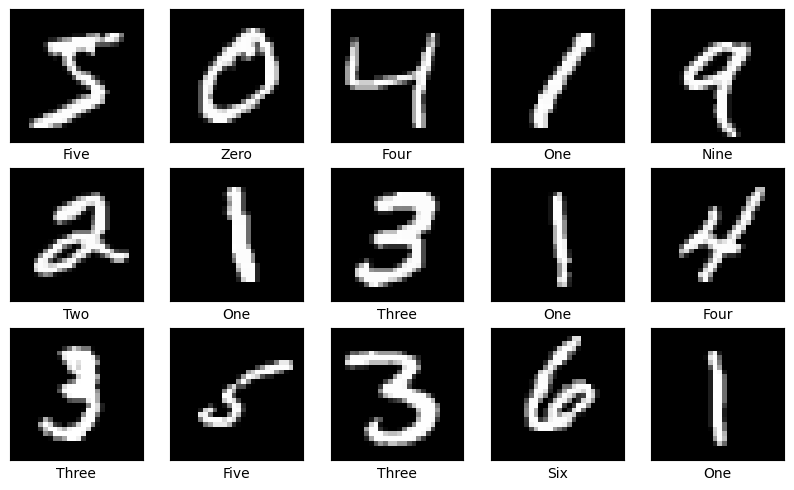

In [7]:
#names of numbers in the order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits
#figsize=(10,10) sets the size of the figure in inches. This makes sure the images are nicely spaced and big enough to see clearly.
plt.figure(figsize=(10,10))

#Looping through the first 15 images in the training dataset (X_train_digit)
for i in range (15):
    #This creates a 5x5 grid of subplots (25 spaces total).i+1 positions each image in the next subplot.Only 15 images are shown, so the rest of the grid (10 slots) will remain empty.
    plt.subplot(5,5,i+1)
    #Removes x and y axis tick marks to keep the display clean
    plt.xticks([])
    plt.yticks([])
    #Displays the i-th image from the training set.cmap='gray' shows the image in grayscale (commonly used for digit images).
    plt.imshow(X_train_digit[i], cmap='gray')
    #Sets the label below each image to indicate which digit it represents.y_train_digit[i] gives the label (like 0, 1, 2...) for the i-th image.
    #col_names is assumed to be a list mapping digit labels to names (e.g., ["zero", "one", "two", ...]).
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [11]:
X_train_digit.shape

(60000, 28, 28)

In [12]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [16]:
X_train_digit.shape    #reshaped from 3D to 2D --- always ANN is 2D

(60000, 784)

In [19]:
y_test_digit.shape

(10000,)

In [20]:
#encoding digit mnist labels   #no from 0 to 9 so 10 classes, if any 5 colors= 5 classes 
y_train_digit= to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [34]:
y_train_digit[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
# preprocessing techniques of ANN 
#input = 2D  output= one hot encoding (always output should be in this format)
#purpose of preprocessing = easy calculation and accuracy
# both ANN and CNN will be in sequential process

In [24]:
#creating base neural networks
model = keras.Sequential([                                        #28 * 28 = 784 neurons , act num = relu = max(0, x)
    layers.Dense(256, activation = 'relu', input_shape=(784,)),   #connected with all neurons in densely format, 256-neuron numbers adjustable
                                                                  #784 neurons is getting interacted with (256 neurons in 1st hidden layer)
    layers.Dense(64, activation = 'relu'),                        #result from 1st hidden layer in interacted with (64 neurons 2nd hidden layer)
    
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(10, activation = 'sigmoid'),          #10 = classes count, output layer, sigmoid = logistic function , displays output as 0 and 1
                                                    #feed forward method , after completing all it goes for back propagation 
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [26]:
# param formula= ouput channel number * (input channel number + 1)

In [ ]:
#https://keras.io/api/ 

In [30]:
#compiling the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [31]:
#fit method
history=model.fit(X_train_digit, y_train_digit, batch_size=100,epochs=10, validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 1.4999 - accuracy: 0.8570 - val_loss: 0.3881 - val_accuracy: 0.9001
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2508 - accuracy: 0.9350 - val_loss: 0.2398 - val_accuracy: 0.9448
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1731 - accuracy: 0.9522 - val_loss: 0.1911 - val_accuracy: 0.9516
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1319 - accuracy: 0.9624 - val_loss: 0.1826 - val_accuracy: 0.9548
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1122 - accuracy: 0.9674 - val_loss: 0.1927 - val_accuracy: 0.9553
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1055 - accuracy: 0.9694 - val_loss: 0.1886 - val_accuracy: 0.9566
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0911 - accuracy: 0.9747 - val_loss: 0.1863 - val_accuracy: 0.9561
Epoch 

In [32]:
#predicting the labels - DIGIT
y_predict=model.predict(X_test_digit)

313/313 [==============================] - 1s 1ms/step


In [35]:
y_predict

array([[1.37582859e-02, 5.50884962e-01, 9.62024271e-01, ...,
        9.99999762e-01, 8.19493532e-01, 9.43656564e-01],
       [9.92004097e-01, 1.00000000e+00, 1.00000000e+00, ...,
        9.97166574e-01, 9.99998331e-01, 9.41441834e-01],
       [2.00256146e-03, 1.00000000e+00, 6.87130764e-02, ...,
        9.99050438e-01, 9.80143845e-01, 3.20882944e-04],
       ...,
       [2.38173117e-04, 2.81088978e-01, 1.03024095e-02, ...,
        1.79418288e-02, 3.55879992e-01, 5.51568091e-01],
       [4.20651808e-02, 1.33783715e-02, 2.15244386e-03, ...,
        1.95743404e-08, 1.00000000e+00, 3.02803437e-06],
       [1.29672214e-01, 6.40114239e-10, 1.89258629e-13, ...,
        2.43994305e-06, 2.49291092e-01, 2.36691079e-07]], dtype=float32)

In [41]:
#end cant understand the above output so we are going to change it as understandable
y_predicts=np.argmax(y_predict, axis=1)
#y_predict = predicted test set data

In [42]:
y_predicts

array([7, 1, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)
#y_test_digit = actual test set data

In [44]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

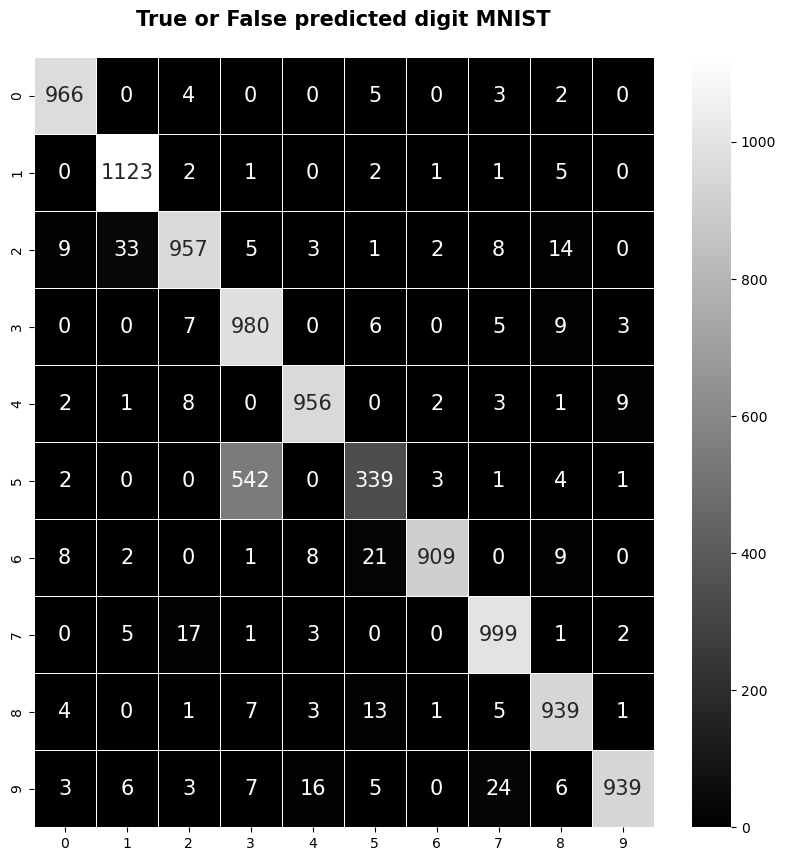

In [48]:
# confusion matrix for Digit MINIST
con_mat=confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [47]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.63      0.97      0.77      1010
           4       0.97      0.97      0.97       982
           5       0.86      0.38      0.53       892
           6       0.99      0.95      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.96      0.96       974
           9       0.98      0.93      0.96      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.90      0.90     10000
weighted avg       0.92      0.91      0.90     10000



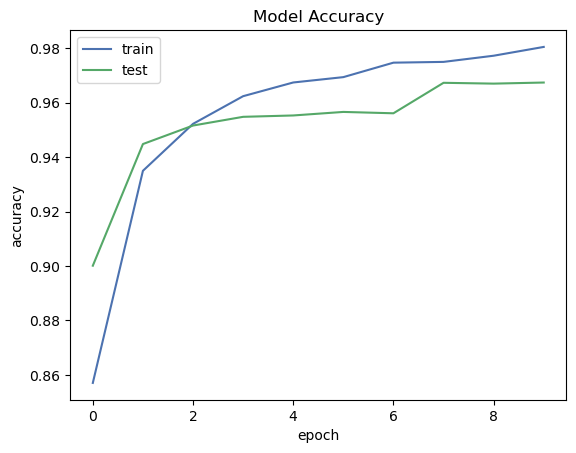

In [51]:
#summarises history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

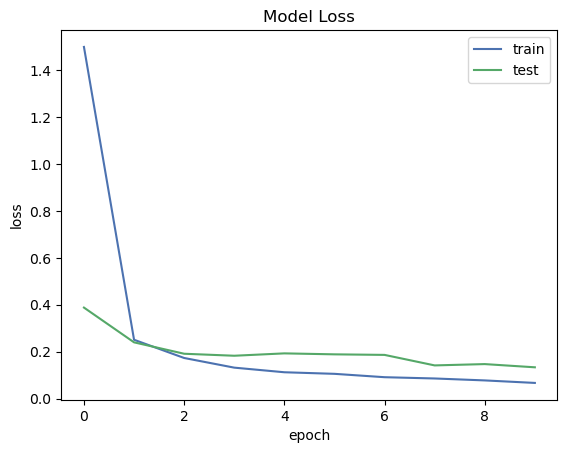

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [57]:
#tf.expand_dims (X_testdigit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single = np.argmax(y_predict_single, axis=1)   #predicted
y_test_digit_eval=np.argmax(y_test_digit, axis=1)         #actual

1/1 [==============================] - 0s 31ms/step


In [56]:
X_test_digit.shape

(10000, 784)

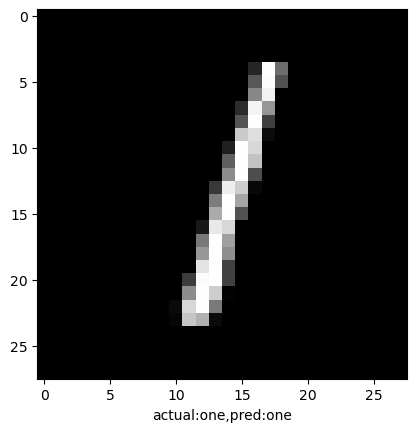

In [58]:
#names of numbers in the dataset in order
col_names= ['zero','one','two','three','four','five','six','seven','eight','nine']

#visualizing the digits 
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')  #[2]-image 2 reshaping as before [28,28]
plt.xlabel ('actual:{},pred:{}'.format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()